# Import packages and creation of DataFrames

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import pytz
from datetime import time

In [3]:
from running.run import Run

# df -> granularity by minute of each run
df = Run().get_total_runs()

# df_agg -> granularity by run
df_agg = Run().get_agg_runs()

# Exploratory Analysis

## Speed and Pace over time

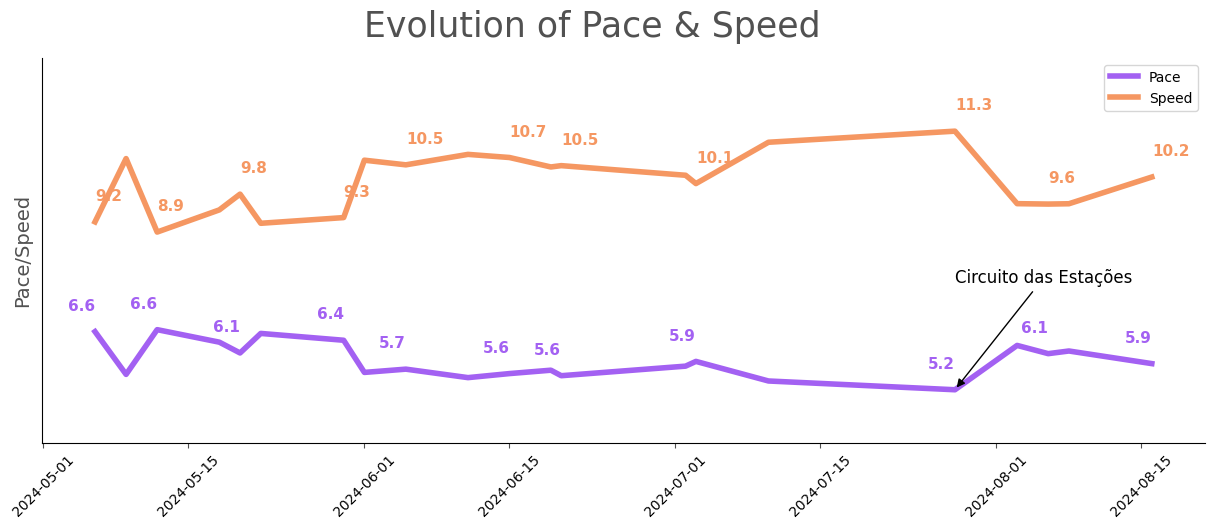

In [5]:
PURPLE = "#A361F2"
ORANGE = "#F59762"
GRAY = "#515151"

fig, ax = plt.subplots(figsize = (15, 5))

ax.plot(df_agg['date'], df_agg['pace'], color=PURPLE, linewidth=4, label='Pace')
ax.plot(df_agg['date'], df_agg['speed'], color=ORANGE, linewidth=4, label='Speed')

index = df_agg[df_agg['date'] == '2024-07-28'].index[0]

x = df_agg['date'][index]
y = df_agg['pace'][index]

ax.spines[['right', 'top']].set_visible(False)

ax.set_yticks([])
ax.set_ylabel('Pace/Speed', fontsize=14, color=GRAY)
ax.tick_params(axis='y', labelsize=12, color=GRAY)
ax.tick_params(axis='x', rotation=45, color=GRAY)
ax.set_ylim(4, 13)

ax.annotate(
    'Circuito das Estações', 
    xy=(x, y),
    xytext=(x, y + 2.5),
    arrowprops=dict(facecolor='black', arrowstyle='-|>'),  # Estilo da seta
    fontsize=12,
    color='black'
)

for i in range(0, len(df_agg), 2):
    ax.text(
        df_agg['date'][i], df_agg['pace'][i] + 0.5, f'{df_agg["pace"][i]:.1f}', fontsize=11, fontweight='bold', color=PURPLE, ha='right'
    )
    ax.text(
        df_agg['date'][i], df_agg['speed'][i] + 0.5, f'{df_agg["speed"][i]:.1f}', fontsize=11, fontweight='bold', color=ORANGE, ha='left'
    )

ax.text(df_agg['date'].min() + pd.Timedelta(days=26), 13.5, 'Evolution of Pace & Speed', fontsize=25, color=GRAY)

ax.legend()

plt.show()

## Distance

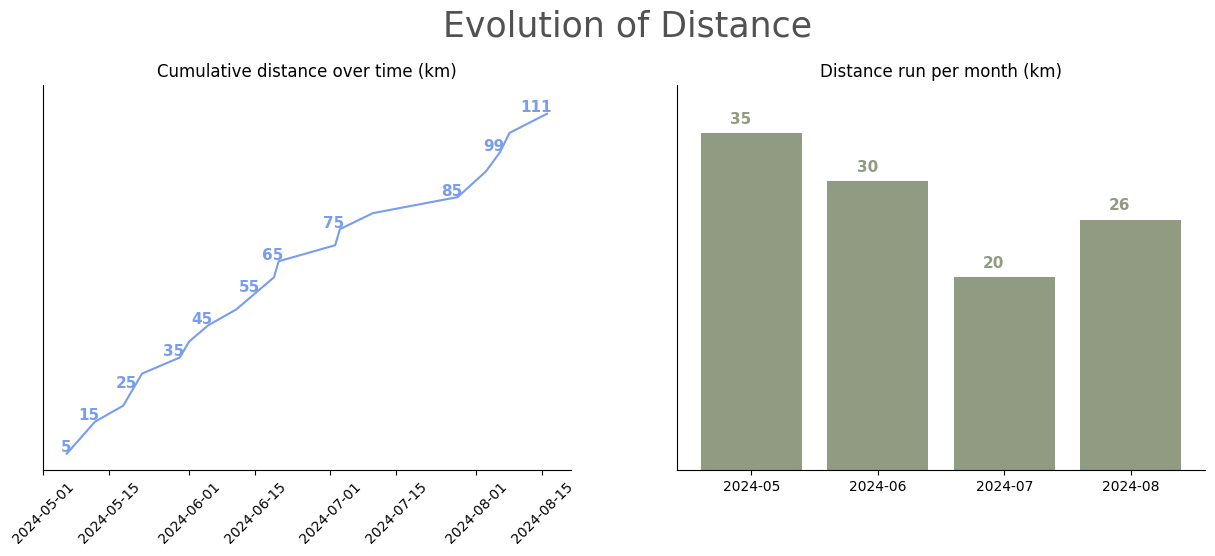

In [6]:
GREEN = '#919B81'
BLUE = '#789CF0'

df_agg['month'] = df_agg['date'].apply(lambda x: str(x)[0:7])

df_agg_monthly = df_agg.groupby('month', as_index=False).agg({'km':'sum'})

fig, axs = plt.subplots(1, 2, figsize = (15, 5))


axs[0].plot(df_agg['date'], df_agg['cum_km'], color=BLUE)
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_title('Cumulative distance over time (km)')
axs[0].set_ylim(0, 120)
axs[0].spines[['right', 'top']].set_visible(False)
axs[0].set_yticks([])
for i in range(0, len(df_agg), 2):
    axs[0].text(
        df_agg['date'][i]+pd.Timedelta(days=1), df_agg['cum_km'][i] + 0.5, f'{df_agg["cum_km"][i]:.0f}', fontsize=11, fontweight='bold', color=BLUE, ha='right'
    )


axs[1].bar(df_agg_monthly['month'], df_agg_monthly['km'], color=GREEN)
axs[1].set_title('Distance run per month (km)')
axs[1].set_ylim(0, 40)
axs[1].spines[['right', 'top']].set_visible(False)
axs[1].set_yticks([])
for i in range(0, len(df_agg_monthly)):
    axs[1].text(
        df_agg_monthly['month'][i], df_agg_monthly['km'][i] + 1, f'{df_agg_monthly["km"][i]:.0f}', fontsize=11, fontweight='bold', color=GREEN, ha='right'
    )

axs[0].text(df_agg['date'].min() + pd.Timedelta(days=80), 135, 'Evolution of Distance', fontsize=25, color=GRAY)

plt.show()

## Pace per km

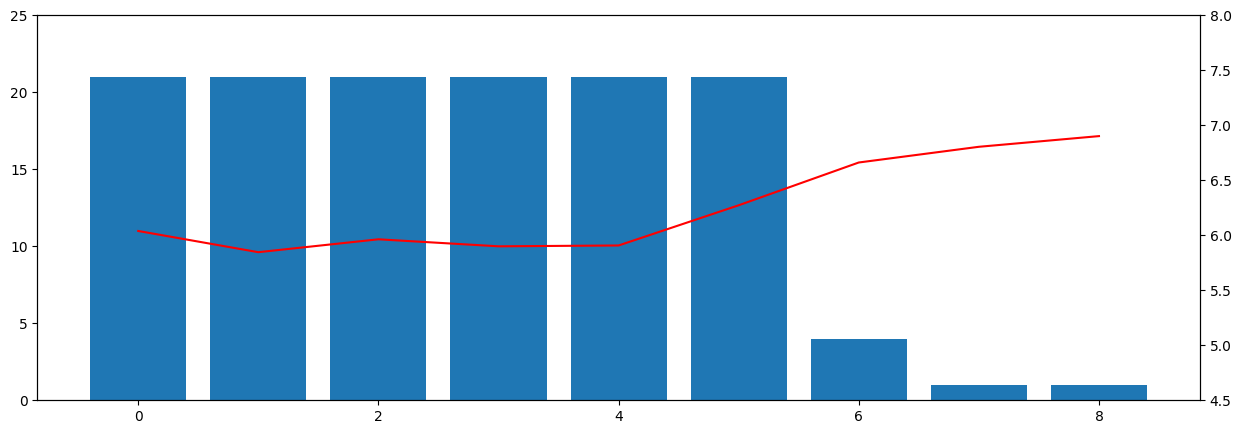

In [7]:
pace_per_km = df.groupby('km', as_index=False).agg({'pace':'mean', 'id':'nunique'})

fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(pace_per_km['km'], pace_per_km['id'])
ax1.set_ylim(0, 25)

ax2 = ax1.twinx()
ax2.plot(pace_per_km['km'], pace_per_km['pace'], color='red')
ax2.set_ylim(4.5, 8)

plt.show()

## Part of the day

# Statistics

In [ ]:
df